In [1]:
## Ref: https://www.youtube.com/watch?v=oXlwWbU8l2o

import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline

### Read

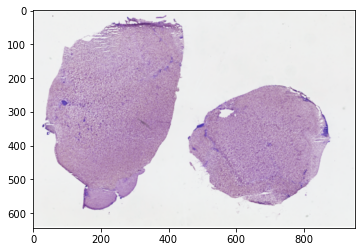

In [2]:
## read
a = cv.imread("image_test.png")

## display
#cv.imshow("window_name",a) ## will open an image window
#cv.waitKey(1000) ## 0 for infinite seconds
plt.imshow(a)

### Resize

In [3]:
## resize
a.shape ## height, width

(644, 954, 3)

In [4]:
h = a.shape[0]
w = a.shape[1]

s = 0.5 ## scale
h1 = int(h*s)
w1 = int(w*s)

print("new_height, new_weight:", (h1,w1))

a1 = cv.resize(a,(w1,h1),interpolation=cv.INTER_AREA) ## note: (width,height) order in this command

new_height, new_weight: (322, 477)


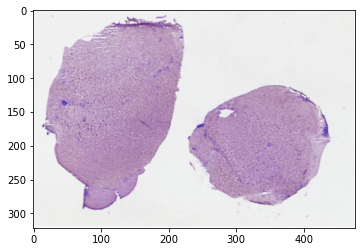

In [5]:
plt.imshow(a1)

In [6]:
a1.shape

(322, 477, 3)

### Draw

In [7]:
import numpy as np

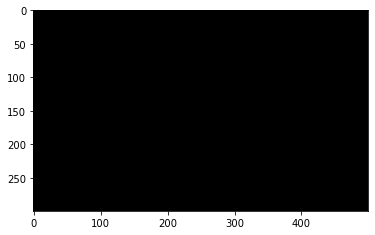

In [8]:
# create a black image
b = np.zeros((300,500,3),dtype='uint8') ## uint8 is a data type of image
plt.imshow(b)

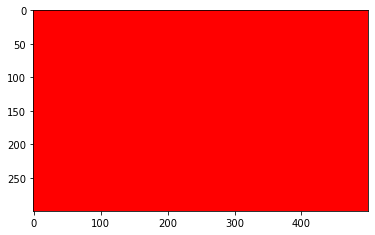

In [9]:
## change the entire image to a certain color
b = np.zeros((300,500,3),dtype='uint8')
b[:] = 255,0,0 ## Red,Blue,Green
plt.imshow(b)

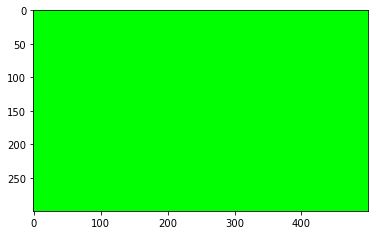

In [10]:
b = np.zeros((300,500,3),dtype='uint8')
b[:] = 0,255,0 ## Red,Blue,Green
plt.imshow(b)

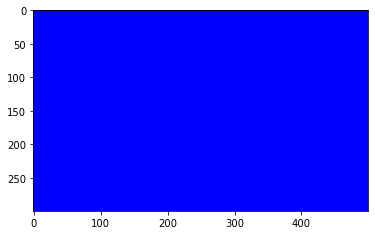

In [11]:
b = np.zeros((300,500,3),dtype='uint8')
b[:] = 0,0,255 ## Red,Blue,Green
plt.imshow(b)

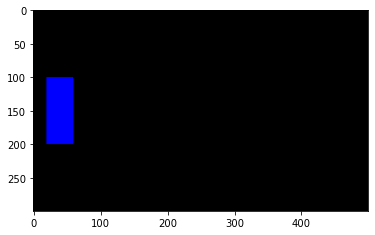

In [12]:
## only in a certain area
b = np.zeros((300,500,3),dtype='uint8')
b[100:200, 20:60] = 0,0,255 ## Red,Blue,Green
plt.imshow(b)

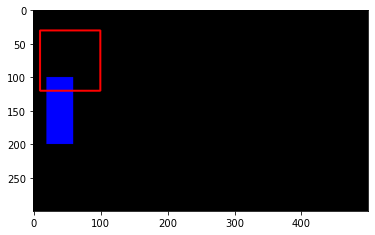

In [13]:
## Draw a rectangle
## cv.rectangle(img,left-top,right-bottom,color,thickness,linetype)
cv.rectangle(b,(10,30),(100,120),(255,0,0),thickness=2)
plt.imshow(b)

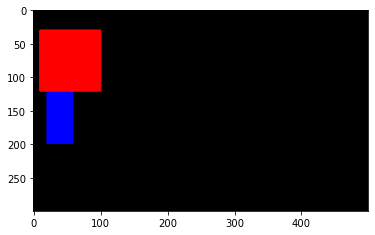

In [14]:
cv.rectangle(b,(10,30),(100,120),(255,0,0),thickness=cv.FILLED)
plt.imshow(b)

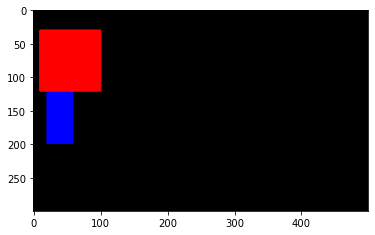

In [15]:
cv.rectangle(b,(10,30),(100,120),(255,0,0),thickness=-1) ## thickness=-1 is the same as cv.FILLED
plt.imshow(b)

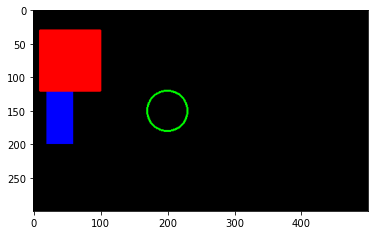

In [16]:
## Draw a circle
## cv.circle(img, center, radius, color, thickness, linetype)
cv.circle(b,(200,150),30,(0,255,0),thickness=2)
plt.imshow(b)

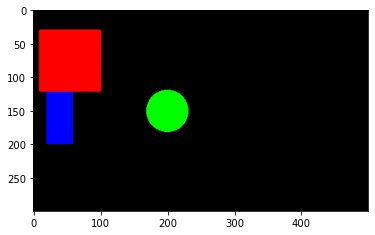

In [17]:
cv.circle(b,(200,150),30,(0,255,0),thickness=-1)
plt.imshow(b)

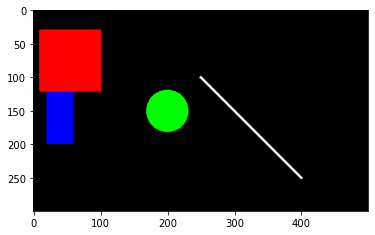

In [18]:
## Draw a line
## cv.line(img,pt1,pt2,color,thickness,linetype)
cv.line(b,(250,100),(400,250),(255,255,255),thickness=3)
plt.imshow(b)

### Write text

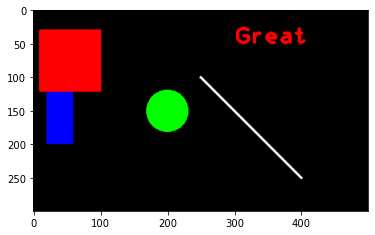

In [19]:
## cv.putText(img,text,org,fontFace,fontScale,color,thickness,linetype)
cv.putText(b,'Great',(300,50),cv.FONT_HERSHEY_PLAIN,2.3,(255,0,0),thickness=4)
plt.imshow(b)

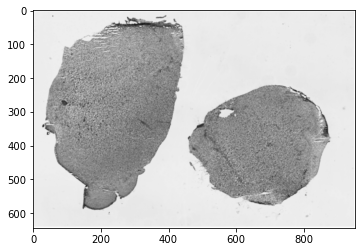

In [20]:
### Convert to grayscale
b = a.copy()

c = cv.cvtColor(b, cv.COLOR_BGR2GRAY)
plt.imshow(c,cmap="gray")

### Blur

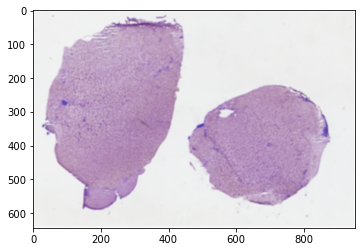

In [21]:
## GaussianBlur(src,ksize,sigmaX,dst,sigmaY)
c = cv.GaussianBlur(b,(5,5),cv.BORDER_DEFAULT)
plt.imshow(c)

### Edge Cascade

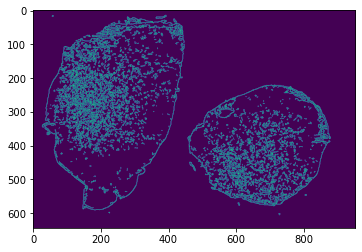

In [22]:
## cv.Canny(img,threshold,threshold2,edges=None,apertureSize=None,L2gradient=None)
c = cv.Canny(b,120,200)
plt.imshow(c)

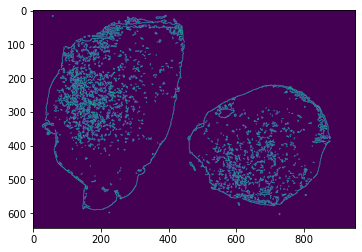

In [23]:
## blur --> Canny
c = cv.cvtColor(b, cv.COLOR_BGR2GRAY)

d = cv.Canny(c,120,200)
plt.imshow(d)

### Dilating the image

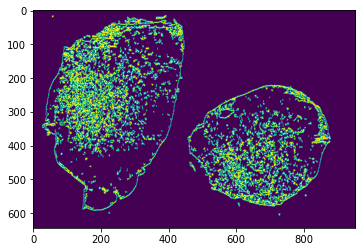

In [24]:
## cv.dilate(src,kernel,dst=None,anchor=None,iterations=None,borderType=None,borderValue=None)
c = cv.Canny(b,120,200)

d = cv.dilate(c,(7,7),iterations=2)
plt.imshow(d)

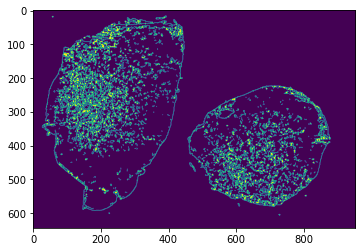

In [25]:
## Eroding the image: recover the original image from the dilated image (not perfect)
## cv.erode(src,kernel,dst=None,anchor=None,iterations=None,borderType=None,borderValue=None)
d1 = cv.erode(d,(7,7),iterations=2)
plt.imshow(d1)

### Crop

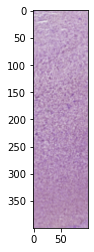

In [26]:
b = a[100:500,200:300]  ## [height,width]
plt.imshow(b)

### Transformations

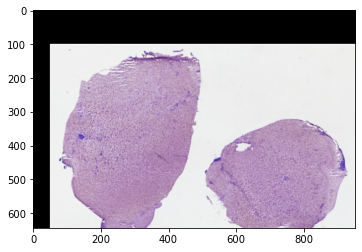

In [27]:
import numpy as np


## move image to a new position
def translate(a, x, y):
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (a.shape[1],a.shape[0]) ## [width, height]
    return cv.warpAffine(a, transMat, dimensions)

## note: +x --> right, +y --> down, -x --> left, -y --> up

b = translate(a, 50, 100)
plt.imshow(b)

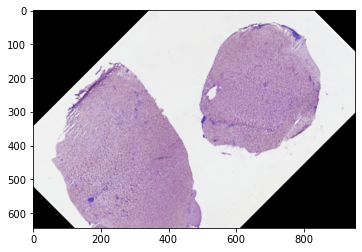

In [28]:
## Rotation:
def rotate(a, angle, rotPoint=None):
    width,height = a.shape[1],a.shape[0]
    
    if rotPoint is None:
        rotPoint = (width//2, height//2)  ## center
        
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0) ## (1.0 = scale)
    dimensions = (width,height)
    
    return cv.warpAffine(a, rotMat, dimensions)

b = rotate(a, 45)
plt.imshow(b)

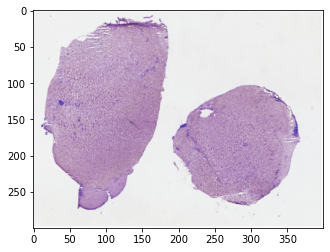

In [29]:
## resizing
b = cv.resize(a, (400,300), interpolation=cv.INTER_CUBIC)
plt.imshow(b)

Text(0.5, 1.0, 'flip -1')

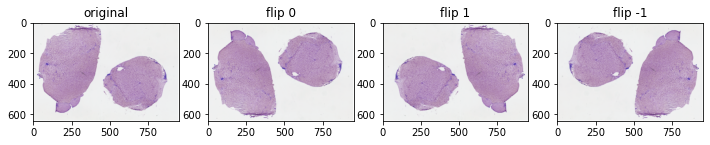

In [30]:
## flipping
b1 = cv.flip(a, 0)
b2 = cv.flip(a, 1)
b3 = cv.flip(a, -1)

fig, ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(b1)
ax[2].imshow(b2)
ax[3].imshow(b3)

ax[0].set_title('original')
ax[1].set_title('flip 0')
ax[2].set_title('flip 1')
ax[3].set_title('flip -1')

Text(0.5, 1.0, 'cropping')

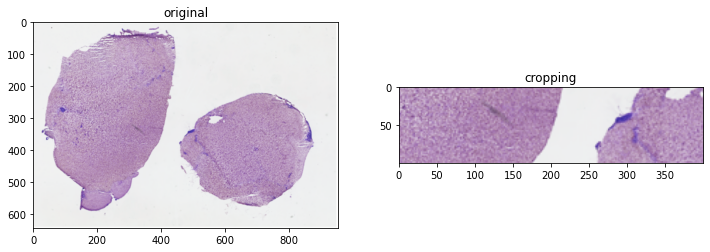

In [31]:
## Cropping
b = a[300:400, 200:600] ## height, width
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(b)

ax[0].set_title('original')
ax[1].set_title('cropping')

### Contours

In [32]:
## gray
b = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## blur
#b2 = cv.GaussianBlur(b, (5,5), cv.BORDER_DEFAULT)

## canny
c = cv.Canny(a, 125, 255)

## cv.findContours(image, mode, method, contours=None)
contours, hierarchies = cv.findContours(c, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("number of contours found:", len(contours))

number of contours found: 1276


In [33]:
## gray
b = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## blur
b2 = cv.GaussianBlur(b, (5,5), cv.BORDER_DEFAULT)

## canny
c = cv.Canny(b2, 125, 255)

## cv.findContours(image, mode, method, contours=None)
contours, hierarchies = cv.findContours(c, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("number of contours found:", len(contours))

number of contours found: 30


In [34]:
## gray
b = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## blur
#b2 = cv.GaussianBlur(b, (5,5), cv.BORDER_DEFAULT)

## canny
#c = cv.Canny(b2, 100, 200)

ret, thresh = cv.threshold(b, 120, 255, cv.THRESH_BINARY)

## cv.findContours(image, mode, method, contours=None)
contours, hierarchies = cv.findContours(c, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("number of contours found:", len(contours))

number of contours found: 30


Text(0.5, 1.0, 'thresh')

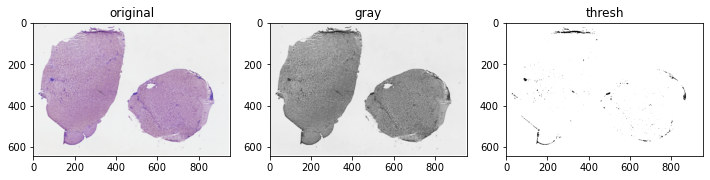

In [35]:
fig, ax = plt.subplots(1,3,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(b, cmap="gray")
ax[2].imshow(thresh, cmap="gray")

ax[0].set_title('original')
ax[1].set_title('gray')
ax[2].set_title('thresh')

In [36]:
b.shape

(644, 954)

In [37]:
thresh.shape

(644, 954)

number of contours found: 30


Text(0.5, 1.0, 'contours in blank')

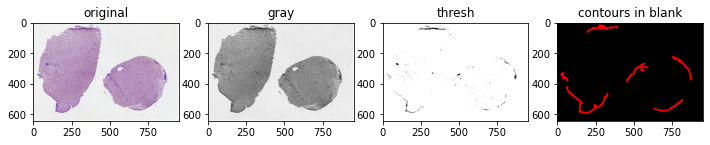

In [38]:
## gray
b = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

#ret, thresh = cv.threshold(b, 120, 255, cv.THRESH_BINARY)

## canny
c = cv.Canny(b2, 125, 255)

## cv.findContours(image, mode, method, contours=None)
contours, hierarchies = cv.findContours(c, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("number of contours found:", len(contours))

## draw contours in blank
a_blank = np.zeros(a.shape, dtype="uint8")

## image, contours, contourIdx, color, 
cv.drawContours(a_blank, contours, -1, (255,0,0),10)

fig, ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(b, cmap="gray")
ax[2].imshow(thresh, cmap="gray")
ax[3].imshow(a_blank, cmap="gray")

ax[0].set_title('original')
ax[1].set_title('gray')
ax[2].set_title('thresh')
ax[3].set_title('contours in blank')

### Color Spaces

Text(0.5, 1.0, 'LAB')

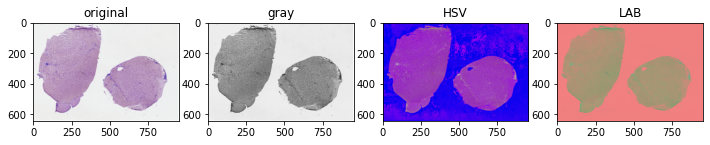

In [39]:
## BGR to Grayscale
a_gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## BGR to HSV
a_hsv = cv.cvtColor(a, cv.COLOR_BGR2HSV)

## BGR to Lab
a_lab = cv.cvtColor(a, cv.COLOR_BGR2LAB)

fig, ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(a_gray, cmap="gray")
ax[2].imshow(a_hsv)
ax[3].imshow(a_lab)

ax[0].set_title('original')
ax[1].set_title('gray')
ax[2].set_title('HSV')
ax[3].set_title('LAB')

Text(0.5, 1.0, 'RGB')

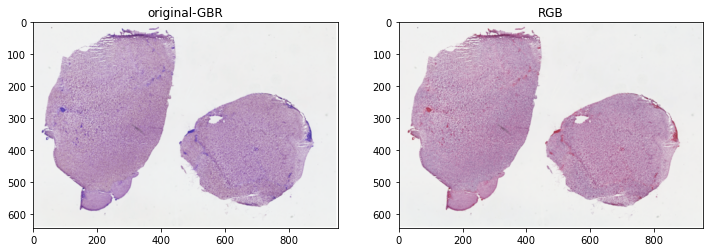

In [40]:
## BGR to RGB
a_rgb = cv.cvtColor(a, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(a_rgb)

ax[0].set_title('original-GBR')
ax[1].set_title('RGB')

Text(0.5, 1.0, 'recover BGR from LAB')

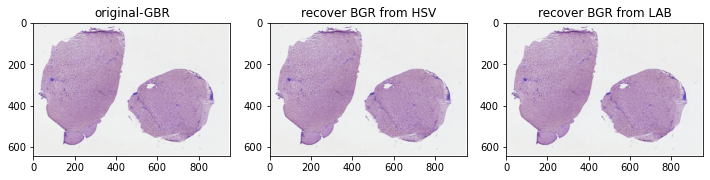

In [41]:
## Convert HSV to BGR
hsv_bgr = cv.cvtColor(a_hsv, cv.COLOR_HSV2BGR)

## Convert LAB to BGR
lab_bgr = cv.cvtColor(a_lab, cv.COLOR_LAB2BGR)

fig, ax = plt.subplots(1,3,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(hsv_bgr)
ax[2].imshow(lab_bgr)

ax[0].set_title('original-GBR')
ax[1].set_title('recover BGR from HSV')
ax[2].set_title('recover BGR from LAB')

### Split and merge

(644, 954, 3) (644, 954) (644, 954) (644, 954) (644, 954, 3)


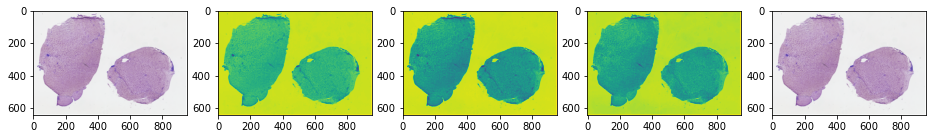

In [42]:
## Split image into blue, green, red
b,g,r = cv.split(a)

## Merge blue, green and red to an image
bgr = cv.merge([b,g,r])

fig, ax = plt.subplots(1,5,figsize=(16,8))
ax[0].imshow(a)
ax[1].imshow(b)
ax[2].imshow(g)
ax[3].imshow(r)
ax[4].imshow(bgr)

print(a.shape, b.shape, g.shape, r.shape, bgr.shape)

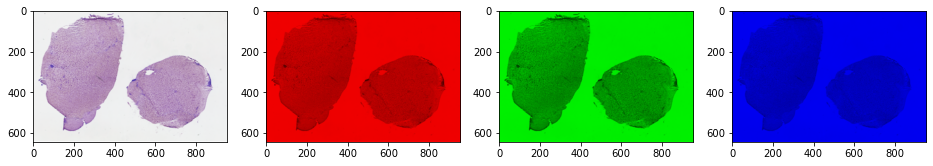

In [43]:
a = cv.imread("image_test.png")

blank = np.zeros(a.shape[:2], dtype='uint8')

a_blue = cv.merge([b, blank, blank])
a_green = cv.merge([blank, g, blank])
a_red = cv.merge([blank, blank, r])

fig, ax = plt.subplots(1,4,figsize=(16,8))
ax[0].imshow(a)
ax[1].imshow(a_blue)
ax[2].imshow(a_green)
ax[3].imshow(a_red)

### Smoothing

Text(0.5, 1.0, 'Bilateral')

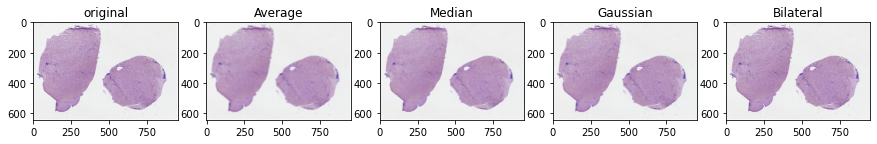

In [44]:
## Average Blur
av = cv.blur(a, (9,9))

## Median Blur
mb = cv.medianBlur(a, 9)

## Gaussian
gs = cv.GaussianBlur(a, (9,9), 0)

## Bilateral: image, d, sigmaColor, sigmaSpace
bl = cv.bilateralFilter(a, 9, 15, 15)

fig, ax = plt.subplots(1,5,figsize=(15,8))
ax[0].imshow(a)
ax[1].imshow(av)
ax[2].imshow(mb)
ax[3].imshow(gs)
ax[4].imshow(bl)

ax[0].set_title('original')
ax[1].set_title('Average')
ax[2].set_title('Median')
ax[3].set_title('Gaussian')
ax[4].set_title('Bilateral')

### Bitwise

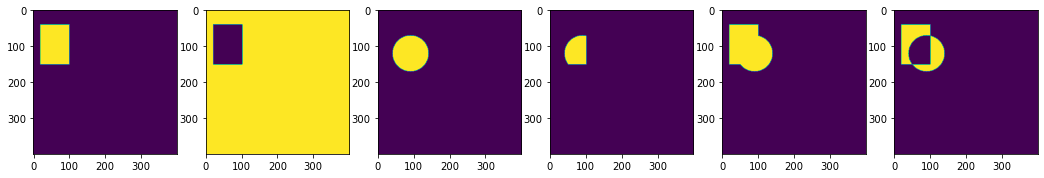

In [45]:
## blank
b = np.zeros((400,400), dtype='uint8')

## cv.rectangle(img, pt1, pt2, color)
b1= cv.rectangle(b.copy(), (20,40), (100,150), 255, -1)


## bitwise_not: inverse the color image
b1_not = cv.bitwise_not(b1)

## cv.circle(img, center, radius, color, thickness, linetype)
b2 = cv.circle(b.copy(),(90,120),50,255,-1)

## bitwise AND: intersection
b12_and = cv.bitwise_and(b1,b2)

## bitwise OR: non-intersections and intersections
b12_or = cv.bitwise_or(b1,b2)

## bitwise XOR: non-intersection
b12_xor = cv.bitwise_xor(b1,b2)

fig, ax = plt.subplots(1,6,figsize=(18,8))
ax[0].imshow(b1)
ax[1].imshow(b1_not)
ax[2].imshow(b2)
ax[3].imshow(b12_and)
ax[4].imshow(b12_or)
ax[5].imshow(b12_xor)